# Field Validation

In [1]:
import pandas as pd #reading dataset
import matplotlib as mpl    #plotting, visualization
import matplotlib.pyplot as plt
import tensorflow as tf #building model
from tensorflow.keras.models import Model
import numpy as np  #playing output with model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import joblib  
import json

import sys
sys.path.append('../../')   # Add parent directory to Python path
from utils.Preprocessing import *
from utils.Segmentation import *


In [3]:
#Preprocessing validation data
#load data
# df_data = pd.read_csv('../../data/test/Accelerometer_ziyi.csv') 
# df_curb = pd.read_csv('../../data/test/ESP_curb.csv')
# #missing value
# missing_info = handle_missing_values_length_index(df_data)
# print(missing_info)
# output = '../../data/test/Accelerometer_ziyi_filled_missing_values.csv'
# fill_missing_values(df_data,output)
# # check missing value
# df_data.isnull().sum() 
## label data 
# df_selected = label_curb_scenes(df_data, df_curb)
# print(df_selected.shape)
# curb_indices = df_selected.index[df_selected['curb_scene'] == 1].tolist()
# print(len(curb_indices))

In [3]:
#load processed data
df = pd.read_csv('../../data/test/Accelerometer_ziyi_processed_segmented.csv')
df.drop(columns=['Unnamed: 0'], inplace=True) 
df

,curb_scene,start_time,end_time,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,...,Acc-Z_91,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100
0,0,2025-03-28 16:00:48.289,2025-03-28 16:00:48.780,8.374924,8.274368,7.814682,8.034943,7.891296,8.073242,8.173798,...,8.078033,8.020569,8.011002,8.078033,8.020569,8.020569,7.953537,7.991852,8.087616,8.039734
1,0,2025-03-28 16:00:48.785,2025-03-28 16:00:49.277,8.030151,7.977478,8.020569,8.054092,8.020569,8.020569,7.987061,...,7.441177,7.259216,7.584824,7.536942,7.278366,7.254425,7.503433,7.704544,7.781158,7.742844
2,0,2025-03-28 16:00:49.284,2025-03-28 16:00:49.773,7.517792,7.723694,7.939178,7.718903,7.733276,7.508209,7.498642,...,6.689407,6.689407,6.459549,6.234497,5.750870,5.477936,5.722137,6.766022,7.991852,8.384491
3,0,2025-03-28 16:00:49.778,2025-03-28 16:00:50.270,8.633499,9.428360,10.046066,8.925583,7.010223,7.082046,6.885727,...,6.689407,8.609543,9.916779,8.930374,8.427597,8.173798,8.384491,7.412445,7.776367,8.011002
4,0,2025-03-28 16:00:50.275,2025-03-28 16:00:50.766,10.960663,10.577591,9.801865,7.599197,6.493073,8.561661,8.892059,...,9.284714,9.232040,8.437164,8.576035,9.030930,9.514557,9.265564,9.686935,10.113113,9.428360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,1,2025-03-28 16:21:31.668,2025-03-28 16:21:32.160,10.046066,11.942276,9.356537,3.586517,5.142746,10.089172,11.200073,...,7.225708,6.698975,8.633499,8.231262,8.576035,7.527374,10.558426,9.720459,8.523361,5.875366
2683,1,2025-03-28 16:21:32.166,2025-03-28 16:22:14.440,7.886505,10.505753,10.797852,6.895294,7.934387,10.558426,8.269577,...,3.653549,-3.064575,-6.066910,-0.565033,18.751389,24.037780,18.875885,2.887405,2.944870,17.075455
2684,1,2025-03-28 16:22:14.444,2025-03-28 16:22:14.935,19.062637,13.929459,-4.845871,-11.214447,2.317581,23.755264,28.926743,...,-10.098740,-0.857117,1.987183,-9.552872,-16.045944,-7.216126,9.069229,44.838608,46.543290,37.282516
2685,1,2025-03-28 16:22:14.937,2025-03-28 16:22:51.503,28.519730,33.782180,21.030670,10.515335,-10.754761,-16.989258,-10.093948,...,6.062119,6.818680,6.900085,6.387726,5.894531,6.354217,6.603210,6.196198,5.334274,6.890518


In [4]:
# prepare data for model
# standardize data
scaler = StandardScaler()
test_data_scaled = scaler.fit_transform(df.iloc[:, 3:])
# Convert the scaled data back to DataFrames for further processing
test_data_scaled = pd.DataFrame(test_data_scaled, columns=df.columns[3:])
# Add the 'curb_scene', 'start_time', and 'end_time' columns back to the scaled DataFrames
test_data_scaled['curb_scene'] = df['curb_scene']
test_data_scaled['start_time'] = df['start_time']
test_data_scaled['end_time'] = df['end_time']

# Filter and slice the data
test_data_scaled_normal = test_data_scaled[test_data_scaled['curb_scene'] == 0].iloc[:, :-3]
test_data_scaled_abnormal = test_data_scaled[test_data_scaled['curb_scene'] == 1].iloc[:, :-3]
# Cast to float32
test_data_scaled_normal = test_data_scaled_normal.astype(np.float32)
test_data_scaled_abnormal = test_data_scaled_abnormal.astype(np.float32)
#Reshape data for LSTM (add time step dimension)
test_data_scaled_normal_lstm = test_data_scaled_normal.values.reshape(test_data_scaled_normal.shape[0], 1, test_data_scaled_normal.shape[1])
test_data_scaled_abnormal_lstm = test_data_scaled_abnormal.values.reshape(test_data_scaled_abnormal.shape[0], 1, test_data_scaled_abnormal.shape[1])
test_data_scaled_normal_lstm.shape, test_data_scaled_abnormal_lstm.shape



((2631, 1, 100), (56, 1, 100))

In [ ]:
def evaluate_classification(y_true, y_pred):
    """
    Evaluate binary classification results and display metrics and visualizations
    
    Parameters:
        y_true (array-like): Ground truth labels
        y_pred (array-like): Predicted labels
        
    Returns:
        dict: Dictionary containing the metrics (confusion matrix, accuracy, specificity, sensitivity)
    """
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Generate detailed classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    
    # Calculate additional metrics
    accuracy = (cm[0,0] + cm[1,1]) / np.sum(cm)
    specificity = cm[0,0] / (cm[0,0] + cm[0,1])
    sensitivity = cm[1,1] / (cm[1,0] + cm[1,1])
    
    print("\nAdditional Metrics:")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Specificity: {specificity:.3f}")  
    print(f"Sensitivity (Recall): {sensitivity:.3f}")
    
    # Visualize confusion matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['0', '1'])
    plt.yticks(tick_marks, ['0', '1'])
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    # Add text annotations
    thresh = cm.max() / 2
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], 'd'),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.show()
    
    return {
        'confusion_matrix': cm,
        'accuracy': accuracy,
        'specificity': specificity,
        'sensitivity': sensitivity
    }


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.84      0.91      2631
           1       0.05      0.36      0.08        56

    accuracy                           0.83      2687
   macro avg       0.51      0.60      0.49      2687
weighted avg       0.96      0.83      0.89      2687


Additional Metrics:
Accuracy: 0.829
Specificity: 0.839
Sensitivity (Recall): 0.357


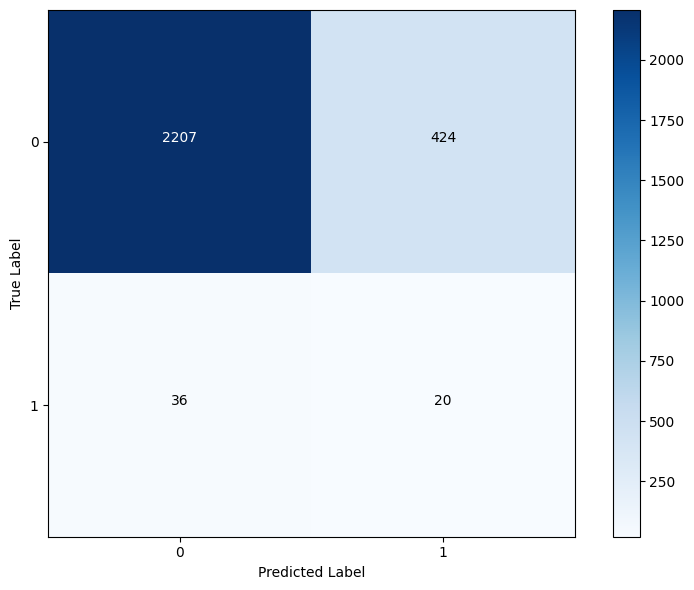

In [ ]:
# # Make predictions using one-class SVM
# one_class_svm = joblib.load('../../models/ocsvm_best.joblib')
# y_pred = one_class_svm.predict(x_test)
# # Convert predictions to binary (1 for anomaly, 0 for normal)
# y_pred = np.where(y_pred == -1, 1, 0)

# # Evaluate results
# metrics = evaluate_classification(y_true, y_pred)



In [6]:
# Make predictions using autoencoder
autoencoder = tf.keras.models.load_model('../../models/autoencoder_best.keras')
with open('../../models/autoencoder_thresholds.json', 'r') as f:
    loaded_thresholds = json.load(f)

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


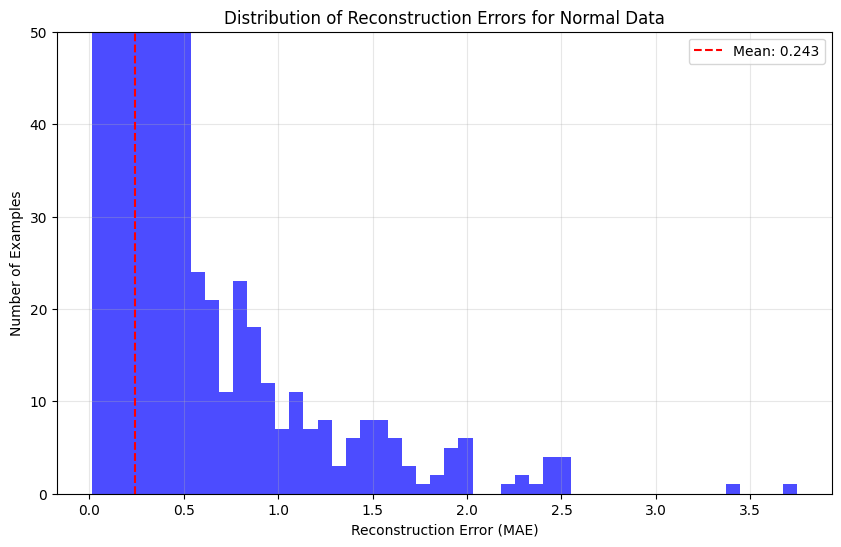

In [9]:
# Plot reconstruction error distribution for normal training data
reconstructions_normal = autoencoder.predict(test_data_scaled_normal)
train_loss_normal = tf.keras.losses.mae(reconstructions_normal, test_data_scaled_normal)

plt.figure(figsize=(10, 6))
plt.hist(train_loss_normal, bins=50, color='blue', alpha=0.7)
plt.axvline(np.mean(train_loss_normal), color='r', linestyle='dashed', 
            label=f'Mean: {np.mean(train_loss_normal):.3f}')

plt.title('Distribution of Reconstruction Errors for Normal Data', fontsize=12)
plt.xlabel('Reconstruction Error (MAE)', fontsize=10)
plt.ylabel('Number of Examples', fontsize=10)
plt.ylim(0, 50)
plt.grid(True, alpha=0.3)
plt.legend()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


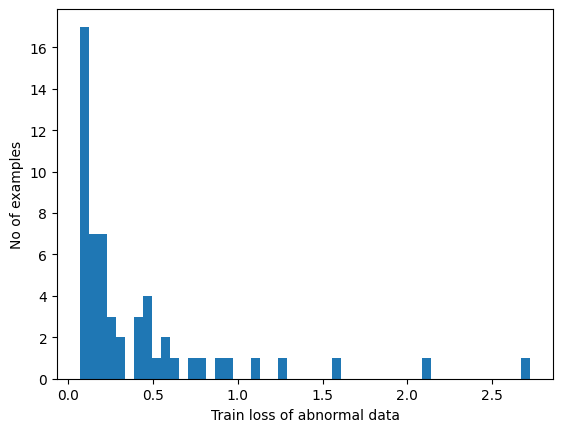

In [8]:
#Plot the reconstruction error on abnormal data from the training set
reconstructions_abnormal = autoencoder.predict(test_data_scaled_abnormal)
train_loss_abnormal = tf.keras.losses.mae(reconstructions_abnormal, test_data_scaled_abnormal)

plt.hist(train_loss_abnormal[None,:], bins=50)
plt.xlabel("Train loss of abnormal data")
plt.ylabel("No of examples")
plt.show()

In [14]:
# Find indices where reconstruction error > 1
train_loss_normal_np = train_loss_normal.numpy()  # Convert to numpy array
train_loss_abnormal_np = train_loss_abnormal.numpy()  # Convert to numpy array

normal_high_error_idx = np.where(train_loss_normal_np > 1.5)[0]
abnormal_high_error_idx = np.where(train_loss_abnormal_np > 1.5)[0]

In [15]:
# Get original DataFrame rows for high error indices with additional information
normal_high_error_info = df[df['curb_scene'] == 0].iloc[normal_high_error_idx][['start_time', 'end_time', 'curb_scene']]
abnormal_high_error_info = df[df['curb_scene'] == 1].iloc[abnormal_high_error_idx][['start_time', 'end_time', 'curb_scene']]

# Print results with reconstruction errors
print("Time ranges for normal data with high reconstruction error (MAE > 1):")
print("=================================================================")
for idx, row in normal_high_error_info.iterrows():
    error_value = train_loss_normal_np[normal_high_error_idx][normal_high_error_info.index.get_loc(idx)]
    print(f"Index {idx}: {row['start_time']} to {row['end_time']}")
    print(f"    Label: {row['curb_scene']} (Normal)")
    print(f"    Reconstruction Error: {error_value:.3f}")

print("\nTime ranges for abnormal data with high reconstruction error (MAE > 1):")
print("===================================================================")
for idx, row in abnormal_high_error_info.iterrows():
    error_value = train_loss_abnormal_np[abnormal_high_error_idx][abnormal_high_error_info.index.get_loc(idx)]
    print(f"Index {idx}: {row['start_time']} to {row['end_time']}")
    print(f"    Label: {row['curb_scene']} (Abnormal)")
    print(f"    Reconstruction Error: {error_value:.3f}")

# Summary statistics
print("\nSummary:")
print(f"Number of high-error normal segments: {len(normal_high_error_info)}")
print(f"Number of high-error abnormal segments: {len(abnormal_high_error_info)}")
print(f"Average reconstruction error for high-error normal segments: {train_loss_normal_np[normal_high_error_idx].mean():.3f}")
print(f"Average reconstruction error for high-error abnormal segments: {train_loss_abnormal_np[abnormal_high_error_idx].mean():.3f}")


Time ranges for normal data with high reconstruction error (MAE > 1):
Index 279: 2025-03-28 16:03:07.829 to 2025-03-28 16:03:08.322
    Label: 0 (Normal)
    Reconstruction Error: 1.814
Index 345: 2025-03-28 16:03:40.602 to 2025-03-28 16:03:41.094
    Label: 0 (Normal)
    Reconstruction Error: 1.547
Index 346: 2025-03-28 16:03:41.098 to 2025-03-28 16:03:41.590
    Label: 0 (Normal)
    Reconstruction Error: 1.963
Index 456: 2025-03-28 16:04:36.717 to 2025-03-28 16:04:37.209
    Label: 0 (Normal)
    Reconstruction Error: 1.549
Index 457: 2025-03-28 16:04:37.215 to 2025-03-28 16:04:37.706
    Label: 0 (Normal)
    Reconstruction Error: 2.020
Index 679: 2025-03-28 16:06:28.447 to 2025-03-28 16:06:28.939
    Label: 0 (Normal)
    Reconstruction Error: 1.637
Index 1095: 2025-03-28 16:09:59.002 to 2025-03-28 16:09:59.493
    Label: 0 (Normal)
    Reconstruction Error: 1.658
Index 1097: 2025-03-28 16:09:59.995 to 2025-03-28 16:10:00.486
    Label: 0 (Normal)
    Reconstruction Error: 1.740
